### Decision Tree Reegressor, Gradient Bosting Regressor, Random Forest Regressor, AdaBoost Regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [3]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score

## A_exam Dataset

In [4]:
exam_data = pd.read_csv("Data/A_exam.csv", na_values='?').dropna()
exam_data.head()

,A,B,C,D,E,F,G,H,I,J,Response
0,47.242366,0.567575,-1.874956,0.065690,-0.744011,0.034882,-0.182950,1.921891,No,Male,0.118086
1,-195.260788,0.175864,0.466484,0.096315,-0.567463,-1.092774,0.210923,-0.138864,No,Male,-2.040642
2,271.560002,0.947224,1.039992,1.310197,-0.193537,1.177232,1.801449,-0.292339,No,Male,0.091437
3,-39.086482,0.945476,1.387181,0.178620,-0.095959,-0.896407,-1.381097,0.534988,Yes,Male,0.781681
4,-121.768597,-0.063864,1.453054,1.070991,-0.885700,-0.829679,-1.398810,-0.383120,No,Male,-0.382995


In [5]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A         1998 non-null   float64
 1   B         1998 non-null   float64
 2   C         1998 non-null   float64
 3   D         1998 non-null   float64
 4   E         1998 non-null   float64
 5   F         1998 non-null   float64
 6   G         1998 non-null   float64
 7   H         1998 non-null   float64
 8   I         1998 non-null   object 
 9   J         1998 non-null   object 
 10  Response  1998 non-null   float64
dtypes: float64(9), object(2)
memory usage: 187.3+ KB


In [6]:
print("Unique classes obs. in feature I: %s" % (np.unique(np.array(exam_data.I))))
print("Unique classes obs. in feature J: %s" % (np.unique(np.array(exam_data.J))))

Unique classes obs. in feature I: ['No' 'Yes']
Unique classes obs. in feature J: ['Female' 'Male']


In [7]:
categorical_label_encoder = LabelEncoder()

exam_data["I"] = categorical_label_encoder.fit_transform(exam_data["I"])
exam_data["J"] = categorical_label_encoder.fit_transform(exam_data["J"])

In [8]:
exam_data.head()

,A,B,C,D,E,F,G,H,I,J,Response
0,47.242366,0.567575,-1.874956,0.065690,-0.744011,0.034882,-0.182950,1.921891,0,1,0.118086
1,-195.260788,0.175864,0.466484,0.096315,-0.567463,-1.092774,0.210923,-0.138864,0,1,-2.040642
2,271.560002,0.947224,1.039992,1.310197,-0.193537,1.177232,1.801449,-0.292339,0,1,0.091437
3,-39.086482,0.945476,1.387181,0.178620,-0.095959,-0.896407,-1.381097,0.534988,1,1,0.781681
4,-121.768597,-0.063864,1.453054,1.070991,-0.885700,-0.829679,-1.398810,-0.383120,0,1,-0.382995


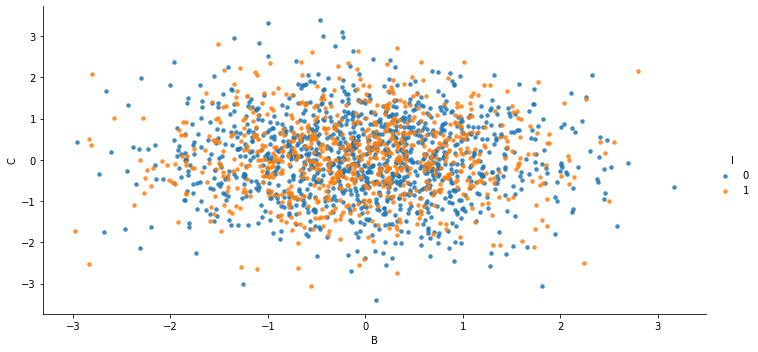

In [9]:
sns.lmplot(y = "C", x = "B", data = exam_data, 
           hue = 'I', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [10]:
X = exam_data.drop(['Response'], axis = 1)
y = exam_data['Response'].values

In [11]:
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (1998, 10), y has shape: (1998,)


## Decision Tree Regressor

#### 1. Decision Tree Regressor (max_depth  = 3)

In [12]:
dt_reg = tree.DecisionTreeRegressor(max_depth = 3)
dt_reg_fit = dt_reg.fit(X,y)
print("Model R^2 Score: %s" % round(dt_reg.score(X,y), 3))

Model R^2 Score: 0.42


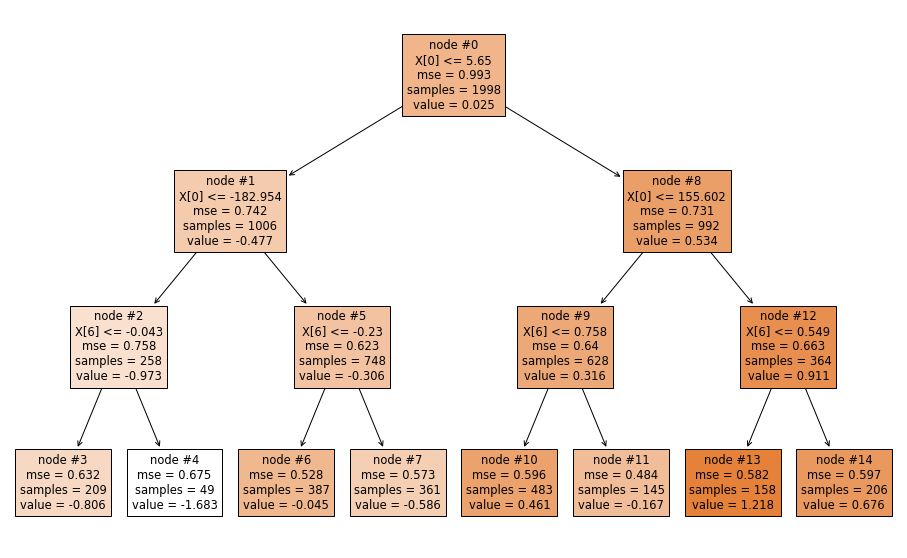

In [13]:
plt.figure(figsize = (16,10))
tree.plot_tree(dt_reg_fit, filled = True, node_ids = True)
plt.show()

***

#### 2. Decision Tree Regressor (estimating optimal max_depth parameter based on test MSE)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (1598, 10), Test feature set shape: (400, 10) 
Train set labels shape: (1598,), Test set labels shape: (400,) 


In [16]:
max_depth_param_list = np.arange(2, 22)
score_results_dtr = []
size = y_test.shape[0]

for depth in max_depth_param_list:
    dt_reg = tree.DecisionTreeRegressor(max_depth = depth)
    dt_reg_fit = dt_reg.fit(X_train, y_train)
    y_predict = dt_reg_fit.predict(X_test)
    
    mean_squared_error = np.mean((y_predict - np.array(y_test).reshape(size,))*(y_predict - np.array(y_test).reshape(size,)))
    score_results_dtr.append(mean_squared_error)
    print("max_depth: %s," % depth, "MSE for Test set = %s" % round(mean_squared_error, 8))

max_depth: 2, MSE for Test set = 0.63576453
max_depth: 3, MSE for Test set = 0.59148319
max_depth: 4, MSE for Test set = 0.58886244
max_depth: 5, MSE for Test set = 0.60222358
max_depth: 6, MSE for Test set = 0.57672248
max_depth: 7, MSE for Test set = 0.58603776
max_depth: 8, MSE for Test set = 0.59524381
max_depth: 9, MSE for Test set = 0.6330072
max_depth: 10, MSE for Test set = 0.66072863
max_depth: 11, MSE for Test set = 0.73864501
max_depth: 12, MSE for Test set = 0.73618347
max_depth: 13, MSE for Test set = 0.74470895
max_depth: 14, MSE for Test set = 0.76110972
max_depth: 15, MSE for Test set = 0.74203265
max_depth: 16, MSE for Test set = 0.75541935
max_depth: 17, MSE for Test set = 0.77170406
max_depth: 18, MSE for Test set = 0.77178459
max_depth: 19, MSE for Test set = 0.77075637
max_depth: 20, MSE for Test set = 0.77678973
max_depth: 21, MSE for Test set = 0.75531182


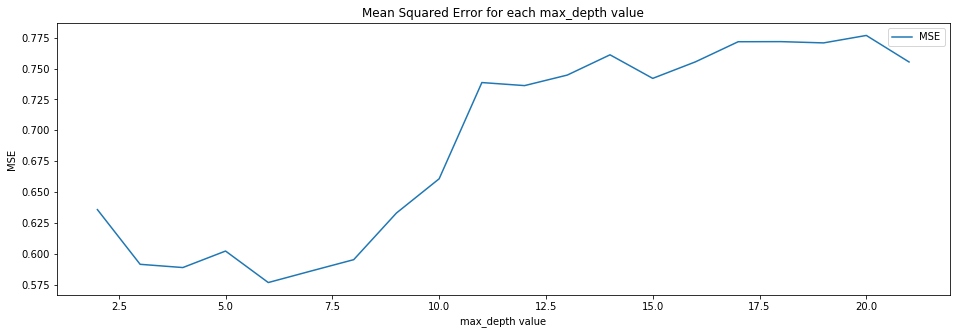

In [17]:
plt.figure(figsize = (16,5))
plt.plot(max_depth_param_list, score_results_dtr, "-", label = "MSE")
plt.title("Mean Squared Error for each max_depth value")
plt.xlabel("max_depth value")
plt.ylabel("MSE")

plt.legend()
plt.show()

In [18]:
optimal_max_depth = np.argmin(score_results_dtr)
print("Optimal Value (MSE is minimum) of max_depth: %s" % max_depth_param_list[optimal_max_depth])

Optimal Value (MSE is minimum) of max_depth: 6


In [19]:
dt_reg_optimal = tree.DecisionTreeRegressor(max_depth = optimal_max_depth)
dt_reg_optimal_fit = dt_reg_optimal.fit(X,y)

print("Model R^2 score: %s" % round(dt_reg_optimal.score(X,y), 3))

Model R^2 score: 0.49


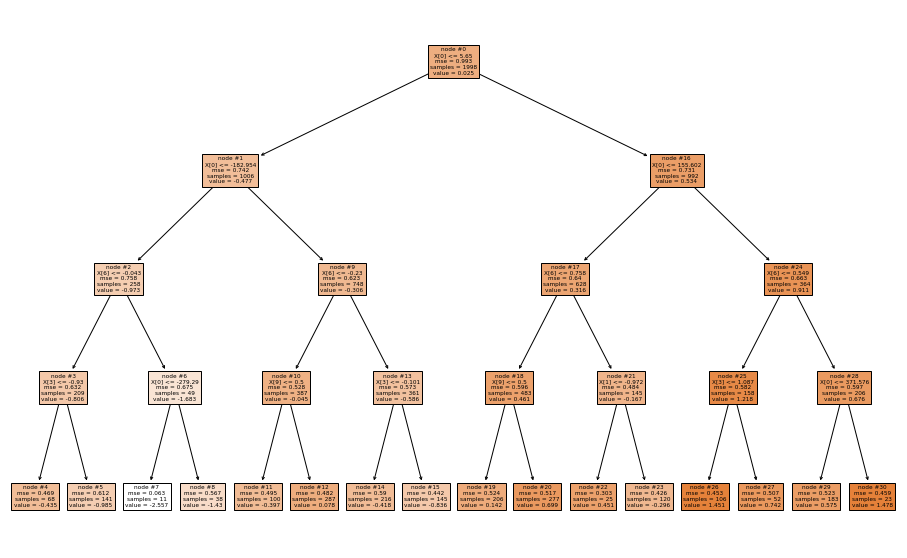

In [20]:
plt.figure(figsize = (16,10))
tree.plot_tree(dt_reg_optimal_fit, filled = True, node_ids = True)
plt.show()

***

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

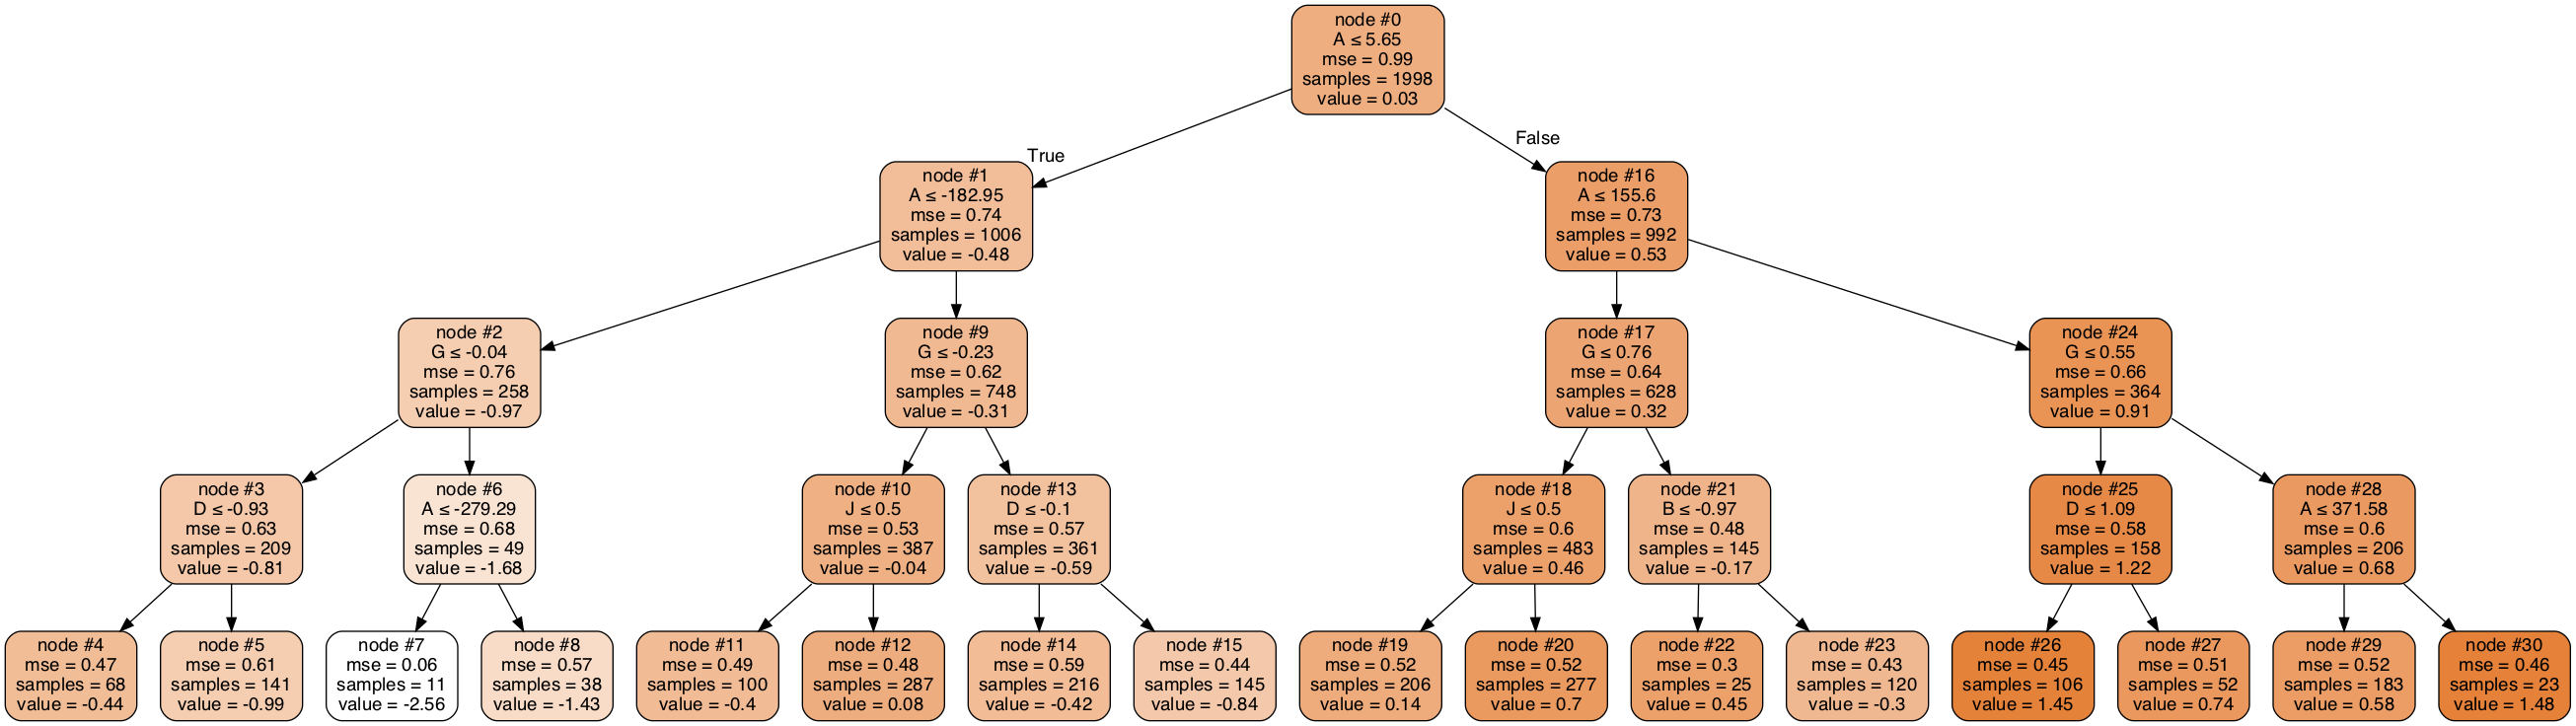

In [23]:
dot_data = StringIO()

export_graphviz(dt_reg_optimal_fit, out_file = dot_data, filled = True, rounded = True, 
                special_characters = True, feature_names = X.columns,precision = 2, node_ids = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width = 1100, height = 11100)

***

#### 3. Decision Tree Regressor (estimating optimal max_depth parameter using CV)

In [24]:
max_depth_param_list = np.arange(2, 22)
score_results_dt = []

for depth in max_depth_param_list:
    dt_reg = tree.DecisionTreeRegressor(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(dt_reg, X_train, y_train, cv = 10) # default scoring is R^2
    score_results_dt.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.306871953066151 
max_depth val: 3, CV Score Avg: 0.3694341700755172 
max_depth val: 4, CV Score Avg: 0.3977316723347789 
max_depth val: 5, CV Score Avg: 0.43269874484533116 
max_depth val: 6, CV Score Avg: 0.4232455727057213 
max_depth val: 7, CV Score Avg: 0.4015308863649958 
max_depth val: 8, CV Score Avg: 0.4104427822389053 
max_depth val: 9, CV Score Avg: 0.3794273567377342 
max_depth val: 10, CV Score Avg: 0.3469592263248133 
max_depth val: 11, CV Score Avg: 0.33614707619086037 
max_depth val: 12, CV Score Avg: 0.3134303621788598 
max_depth val: 13, CV Score Avg: 0.30356502684972947 
max_depth val: 14, CV Score Avg: 0.2718585852891242 
max_depth val: 15, CV Score Avg: 0.29851008759619113 
max_depth val: 16, CV Score Avg: 0.2854692523534845 
max_depth val: 17, CV Score Avg: 0.28351079955080183 
max_depth val: 18, CV Score Avg: 0.2947645332317885 
max_depth val: 19, CV Score Avg: 0.2712228614117863 
max_depth val: 20, CV Score Avg: 0.282324726770926

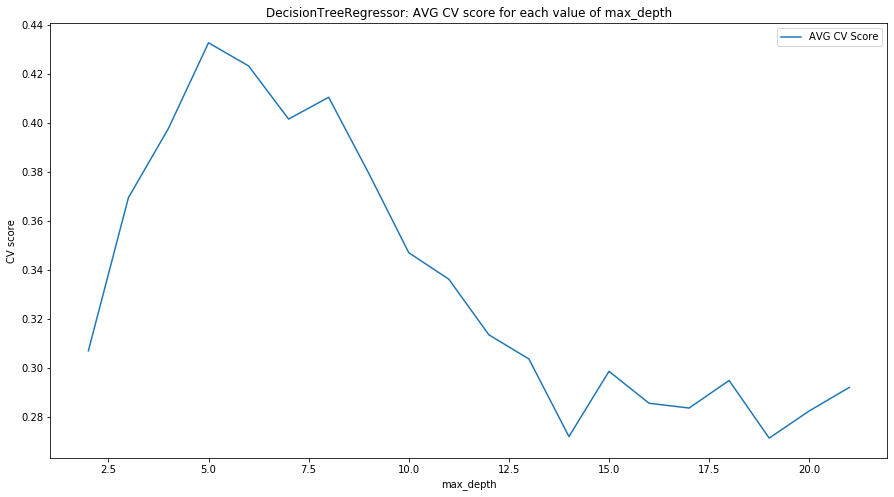

In [25]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_dt), axis = 1), label = "AVG CV Score")
plt.title("DecisionTreeRegressor: AVG CV score for each value of max_depth")
plt.xlabel("max_depth")
plt.ylabel("CV score")

plt.legend()
plt.show()

In [26]:
dt_avg_cv_scores = np.mean(np.array(score_results_dt), axis = 1)
dt_max_avg_accuracy_index = np.argmax(dt_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[dt_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 5


In [27]:
mod_dt_reg = tree.DecisionTreeRegressor(max_depth = max_depth_param_list[dt_max_avg_accuracy_index])
mod_dt_reg_fit = mod_dt_reg.fit(X_train,y_train)
model_dt_score = mod_dt_reg_fit.score(X_test,y_test)
print("Model Score on test set: %s" % model_dt_score)

Model Score on test set: 0.37367737545578594


#### Gradient Boosting Regressor

In [28]:
max_depth_param_list = np.arange(2, 12)
score_results_gb = []

for depth in max_depth_param_list:
    gb_reg = GradientBoostingRegressor(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(gb_reg, X_train, y_train, cv = 10) # default scoring is R^2
    score_results_gb.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.6709986819688999 
max_depth val: 3, CV Score Avg: 0.7281082518233237 
max_depth val: 4, CV Score Avg: 0.728693980486253 
max_depth val: 5, CV Score Avg: 0.7243810638390059 
max_depth val: 6, CV Score Avg: 0.7184034549866044 
max_depth val: 7, CV Score Avg: 0.7007506771106471 
max_depth val: 8, CV Score Avg: 0.6723174810795602 
max_depth val: 9, CV Score Avg: 0.6485846154411596 
max_depth val: 10, CV Score Avg: 0.6218246613462164 
max_depth val: 11, CV Score Avg: 0.581173314927647 


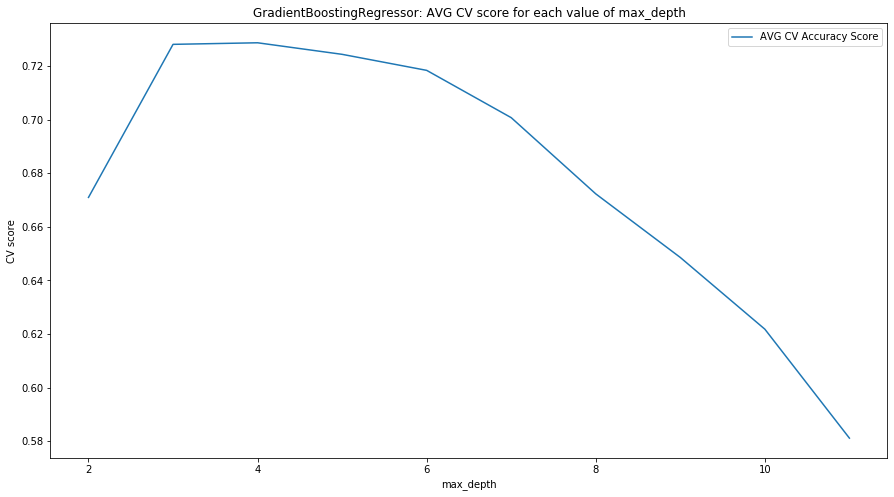

In [29]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_gb), axis = 1), label = "AVG CV Accuracy Score")
plt.title("GradientBoostingRegressor: AVG CV score for each value of max_depth")
plt.xlabel("max_depth")
plt.ylabel("CV score")

plt.legend()
plt.show()

In [30]:
gb_avg_cv_scores = np.mean(np.array(score_results_gb), axis = 1)
gb_max_avg_accuracy_index = np.argmax(gb_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[gb_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 4


In [31]:
mod_gb_reg = GradientBoostingRegressor(max_depth = max_depth_param_list[dt_max_avg_accuracy_index])
mod_gb_reg_fit = mod_gb_reg.fit(X_train,y_train)
model_gb_score = mod_gb_reg_fit.score(X_test,y_test)
print("Model Score on test set: %s" % model_gb_score)

Model Score on test set: 0.7070255418141579


#### Random Forest Regressor

In [32]:
max_depth_param_list = np.arange(2, 23)
score_results_rf = []

for depth in max_depth_param_list:
    rf_reg = RandomForestRegressor(max_depth = depth, max_features = 3, n_estimators = 100)
    kfold = KFold(n_splits=10)
    score = cross_val_score(rf_reg, X_train, y_train, cv = 10) # default scoring is R^2
    score_results_rf.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.20861746576899992 
max_depth val: 3, CV Score Avg: 0.28295756071701994 
max_depth val: 4, CV Score Avg: 0.3442849618116573 
max_depth val: 5, CV Score Avg: 0.4056659251315865 
max_depth val: 6, CV Score Avg: 0.4476031339524445 
max_depth val: 7, CV Score Avg: 0.493446261336506 
max_depth val: 8, CV Score Avg: 0.5198147377860916 
max_depth val: 9, CV Score Avg: 0.550161727649541 
max_depth val: 10, CV Score Avg: 0.5616562472710417 
max_depth val: 11, CV Score Avg: 0.5753670959653633 
max_depth val: 12, CV Score Avg: 0.5765084530182628 
max_depth val: 13, CV Score Avg: 0.5917653307663518 
max_depth val: 14, CV Score Avg: 0.5902724317033976 
max_depth val: 15, CV Score Avg: 0.5882651084399553 
max_depth val: 16, CV Score Avg: 0.5914108401949003 
max_depth val: 17, CV Score Avg: 0.5960104063573219 
max_depth val: 18, CV Score Avg: 0.5985101441439632 
max_depth val: 19, CV Score Avg: 0.5907043778945882 
max_depth val: 20, CV Score Avg: 0.597098372047878 
ma

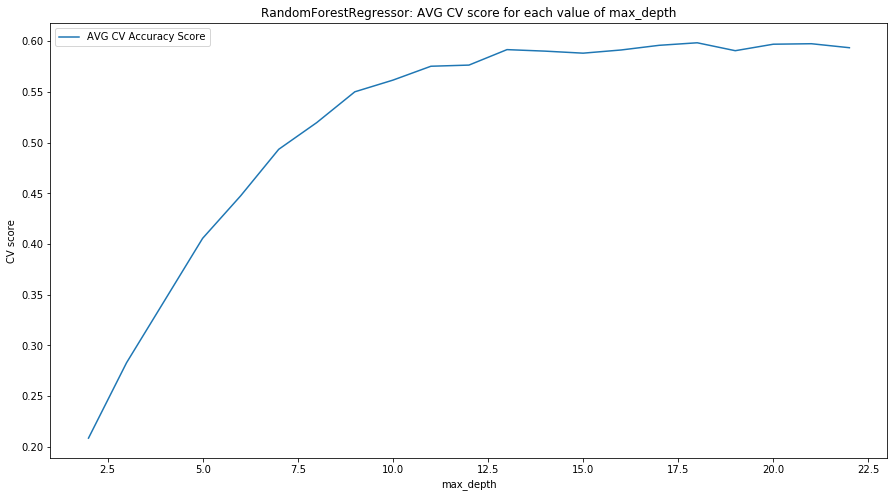

In [33]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_rf), axis = 1), label = "AVG CV Accuracy Score")
plt.title("RandomForestRegressor: AVG CV score for each value of max_depth")
plt.xlabel("max_depth")
plt.ylabel("CV score")

plt.legend()
plt.show()

In [34]:
rf_avg_cv_scores = np.mean(np.array(score_results_rf), axis = 1)
rf_max_avg_accuracy_index = np.argmax(rf_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[rf_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 18


In [35]:
mod_rf_reg = RandomForestRegressor(max_depth = max_depth_param_list[rf_max_avg_accuracy_index], oob_score = True)
mod_rf_reg_fit = mod_rf_reg.fit(X_train,y_train)
model_rf_score = mod_rf_reg_fit.score(X_test,y_test)
print("Model Score on test set: %s" % model_gb_score)

Model Score on test set: 0.7070255418141579


#### Ada Boost Regressor

In [36]:
max_depth_param_list = np.arange(2, 22)
score_results_ab = []

for depth in max_depth_param_list:
    ab_reg = AdaBoostRegressor(tree.DecisionTreeRegressor(
        max_depth = depth), n_estimators = 500, learning_rate = 1)
    kfold = KFold(n_splits=10)
    score = cross_val_score(ab_reg, X_train, y_train, cv = 10) # default scoring is R^2
    score_results_ab.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.49254441698105406 
max_depth val: 3, CV Score Avg: 0.6255662764412625 
max_depth val: 4, CV Score Avg: 0.6657436987990524 
max_depth val: 5, CV Score Avg: 0.680358688393861 
max_depth val: 6, CV Score Avg: 0.684185927011612 
max_depth val: 7, CV Score Avg: 0.6884237795323263 
max_depth val: 8, CV Score Avg: 0.6891991305075782 
max_depth val: 9, CV Score Avg: 0.6881991503203263 
max_depth val: 10, CV Score Avg: 0.6902328177775778 
max_depth val: 11, CV Score Avg: 0.6916416672684119 
max_depth val: 12, CV Score Avg: 0.6924661001090411 
max_depth val: 13, CV Score Avg: 0.6918105598918711 
max_depth val: 14, CV Score Avg: 0.6892256170368813 
max_depth val: 15, CV Score Avg: 0.6944732499696189 
max_depth val: 16, CV Score Avg: 0.689495228155719 
max_depth val: 17, CV Score Avg: 0.692315398890796 
max_depth val: 18, CV Score Avg: 0.6917500525202765 
max_depth val: 19, CV Score Avg: 0.6958252559895561 
max_depth val: 20, CV Score Avg: 0.6917311183290916 
max_

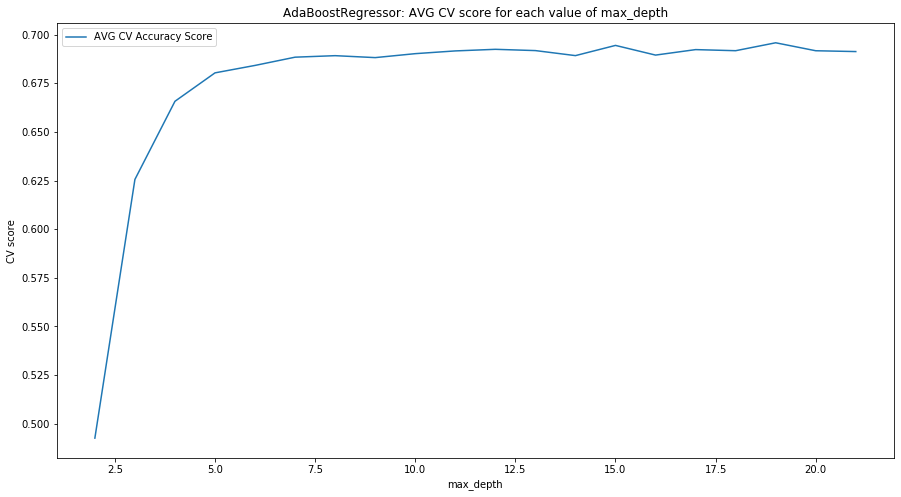

In [37]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_ab), axis = 1), label = "AVG CV Accuracy Score")
plt.title("AdaBoostRegressor: AVG CV score for each value of max_depth")
plt.xlabel("max_depth")
plt.ylabel("CV score")

plt.legend()
plt.show()

In [38]:
ab_avg_cv_scores = np.mean(np.array(score_results_ab), axis = 1)
ab_max_avg_accuracy_index = np.argmax(ab_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[ab_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 19


In [39]:
mod_ab_reg = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth = max_depth_param_list[
    ab_max_avg_accuracy_index]), n_estimators = 500, learning_rate = 1)
mod_ab_reg_fit = mod_ab_reg.fit(X_train,y_train)
model_ab_score = mod_ab_reg_fit.score(X_test,y_test)
print("Model Score on test set: %s" % model_ab_score)

Model Score on test set: 0.6538106574544609


***